# 2 sample analysis- all cells



#  <font color='blue'>Contents</font> 
1. Install package, load libraries and data
2.

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
#library("readxl")
library("ggplot2")
library("xlsx")
library("reshape2")

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Cross species alignment using Seurat V3

In [2]:
FISH1m<-read.table(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/mouse_gene_for_FISH1m_all.txt")
FISH2m<-read.table(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/mouse_gene_for_FISH2m_all.txt")
cntl.data <-Read10X(data.dir = "/media/garret/New Volume/scRNAseq_data/Yoshiko/180725LHb/raw_gene_bc_matrices/mm10")
stim.data <-Read10X(data.dir = "/media/garret/New Volume/scRNAseq_data/Yoshiko/180905LHb/raw_gene_bc_matrices/mm10")

In [3]:
# need to change name
colnames(FISH1m) = paste0(colnames(FISH1m),"FISH1")
FISH1<-CreateSeuratObject(counts=FISH1m,min.cells = 3, min.features = 200, project = "10X_Hb")
FISH1@meta.data$stim <- "FISH1"
colnames(FISH2m) = paste0(colnames(FISH2m),"FISH2")
FISH2<-CreateSeuratObject(counts=FISH2m,min.cells = 3, min.features = 200, project = "10X_Hb")
FISH2@meta.data$stim <- "FISH2"

In [4]:
colnames(cntl.data) = paste0(colnames(cntl.data),"cntl")
cntl<- CreateSeuratObject(counts = cntl.data, min.cells = 3, min.features = 200, project = "10X_Hb")
Neuron_id<-readRDS(file =  "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/clean_cntl_barcode.rds")
Habenula_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Habenula_id.rds")
Neuron_id<-intersect(Neuron_id,Habenula_id)
cntl<-subset(x = cntl, cells=Neuron_id)
cntl@meta.data$stim <- "cntl"

In [5]:
colnames(stim.data) = paste0(colnames(stim.data),"stim")
stim<- CreateSeuratObject(counts = stim.data, min.cells = 3, min.features = 200, project = "10X_Hb")
Neuron_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/clean_stim_barcode.rds")
Habenula_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Habenula_id.rds")
Neuron_id<-intersect(Neuron_id,Habenula_id)
stim<-subset(x =stim, cells=Neuron_id)
stim@meta.data$stim <- "stim"

In [6]:
genes_analyzed<-intersect(rownames(as.matrix(FISH1@assays$RNA@data)),rownames(as.matrix(cntl@assays$RNA@data)))
genes_analyzed<-intersect(genes_analyzed,rownames(as.matrix(stim@assays$RNA@data)))
genes_analyzed<-intersect(genes_analyzed,rownames(as.matrix(FISH2@assays$RNA@data)))

In [7]:
# one more time
FISH1m<-read.table(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/mouse_gene_for_FISH1m_all.txt")
FISH2m<-read.table(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/mouse_gene_for_FISH2m_all.txt")
cntl.data <-Read10X(data.dir = "/media/garret/New Volume/scRNAseq_data/Yoshiko/180725LHb/raw_gene_bc_matrices/mm10")
stim.data <-Read10X(data.dir = "/media/garret/New Volume/scRNAseq_data/Yoshiko/180905LHb/raw_gene_bc_matrices/mm10")

In [8]:
FISH1m<-FISH1m[which(rownames(FISH1m) %in% genes_analyzed),]
FISH2m<-FISH2m[which(rownames(FISH2m) %in% genes_analyzed),]
cntl.data<-cntl.data[which(rownames(cntl.data) %in% genes_analyzed),]
stim.data<-stim.data[which(rownames(stim.data) %in% genes_analyzed),]

In [9]:
colnames(FISH1m) = paste0(colnames(FISH1m),"FISH1")
FISH1<-CreateSeuratObject(counts=FISH1m,min.cells = 3, min.features = 200, project = "10X_Hb")
FISH1@meta.data$stim <- "FISH1"
colnames(FISH2m) = paste0(colnames(FISH2m),"FISH2")
FISH2<-CreateSeuratObject(counts=FISH2m,min.cells = 3, min.features = 200, project = "10X_Hb")
FISH2@meta.data$stim <- "FISH2"

In [10]:
colnames(stim.data) = paste0(colnames(stim.data),"stim")
stim<- CreateSeuratObject(counts = stim.data, min.cells = 3, min.features = 200, project = "10X_Hb")
Neuron_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/clean_stim_barcode.rds")
Habenula_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Habenula_id.rds")
Neuron_id<-intersect(Neuron_id,Habenula_id)
stim<-subset(x =stim, cells=Neuron_id)
stim@meta.data$stim <- "stim"

In [11]:
colnames(cntl.data) = paste0(colnames(cntl.data),"cntl")
cntl<- CreateSeuratObject(counts = cntl.data, min.cells = 3, min.features = 200, project = "10X_Hb")
Neuron_id<-readRDS(file =  "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/clean_cntl_barcode.rds")
Habenula_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Habenula_id.rds")
Neuron_id<-intersect(Neuron_id,Habenula_id)
cntl<-subset(x = cntl, cells=Neuron_id)
cntl@meta.data$stim <- "cntl"

In [473]:
mito.features <- grep(pattern = "^mt-", x = rownames(x = FISH1), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = FISH1, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = FISH1, slot = 'counts'))
FISH1[['percent.mito']] <- percent.mito

In [474]:
mito.features <- grep(pattern = "^mt-", x = rownames(x = FISH2), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = FISH2, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = FISH2, slot = 'counts'))
FISH2[['percent.mito']] <- percent.mito

In [475]:
mito.features <- grep(pattern = "^mt-", x = rownames(x = cntl), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = cntl, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = cntl, slot = 'counts'))
cntl[['percent.mito']] <- percent.mito

In [476]:
mito.features <- grep(pattern = "^mt-", x = rownames(x = stim), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = stim, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = stim, slot = 'counts'))
stim[['percent.mito']] <- percent.mito

In [477]:
S_merge<-merge(x = FISH1, y = FISH2)
S_merge<-merge(x = S_merge, y = cntl)
S_merge<-merge(x = S_merge, y = stim)

In [478]:
S_merge<-NormalizeData(object =S_merge,verbose = FALSE) 

In [479]:
S_merge<- FindVariableFeatures(object =S_merge,selection.method = "vst", nfeatures = 100, verbose = FALSE)

In [480]:
S_merge<- ScaleData(object = S_merge, features = rownames(x =S_merge))

Centering and scaling data matrix


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in JackStraw(object = S_merge, num.replicate = 100):
“Number of variable genes given 0.01 as the prop.freq is low. Consider including more variable genes and/or increasing prop.freq. Continuing with 3 genes in every random sampling.”Warning message:
“Removed 490 rows containing missing values (geom_point).”Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13269
Number of edges: 404944

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9012
Number of communities: 14
Elapsed time: 0 seconds


15:27:39 Read 13269 rows and found 7 numeric columns
15:27:39 Using Annoy for neighbor search, n_neighbors = 30
15:27:39 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
15:27:40 Writing NN index file to temp file /tmp/RtmpIWoLyK/file537d60c6a5f9
15:27:40 Searching Annoy index using 1 thread, search_k = 3000
15:27:44 Annoy recall = 98.79%
15:27:44 Commencing smooth kNN distance calibration using 1 thread
15:27:44 196 smooth knn distance failures
15:27:45 Initializing from normalized Laplacian + noise
15:27:45 Commencing optimization for 200 epochs, with 524410 positive edges
15:27:55 Optimization finished


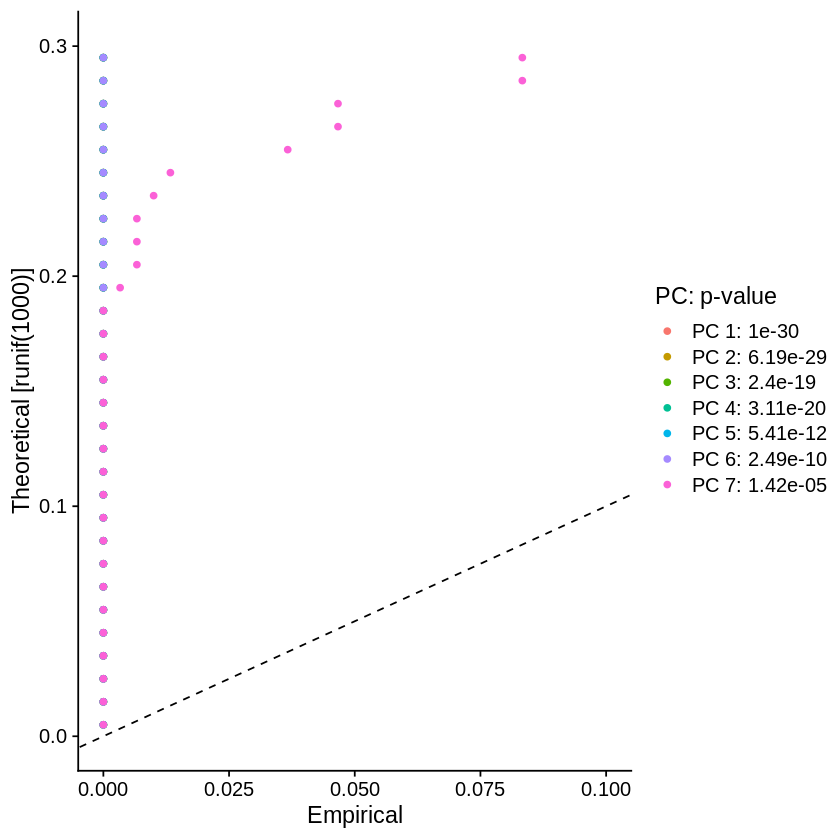

In [481]:
S_merge<- RunPCA(object = S_merge, features = VariableFeatures(object =S_merge), verbose = FALSE)
S_merge <- JackStraw(object =S_merge, num.replicate = 100)
S_merge<- ScoreJackStraw(object =S_merge, dims = 1:7)
JackStrawPlot(object = S_merge, dims = 1:7)
S_merge<- FindNeighbors(object =S_merge, dims = 1:7)
S_merge <- FindClusters(object =S_merge, resolution = 0.5)
S_merge<- RunUMAP(object = S_merge, reduction = "pca", dims = 1:7)

In [482]:
library(cowplot)

In [483]:
species<-vector()
for (i in 1:dim(S_merge@meta.data)[1]){
   if (S_merge@meta.data$stim[i]=="FISH1"){species[i]<-"FISH"}
    else if  (S_merge@meta.data$stim[i]=="FISH2"){species[i]<-"FISH"}
    else  {species[i]<-"Mouse"}
}
S_merge@meta.data$species<-species

Warning message:
“Removed 203 rows containing missing values (geom_point).”

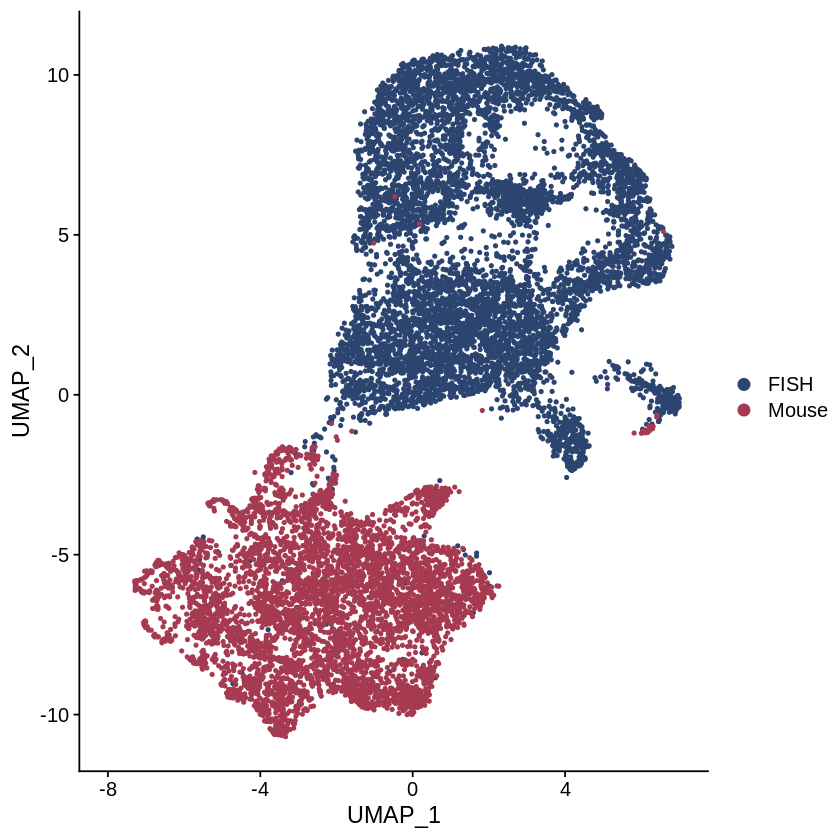

In [488]:
p1 <-DimPlot(object = S_merge, reduction = 'umap', group.by = "species",pt.size = 0.8,cols=c("#2b4570","#a63a50"))+xlim(-8,7)
plot_grid(p1,label_size = 50)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/merge_Neurons_umap_species_Fig4.pdf",width=10,height=10)

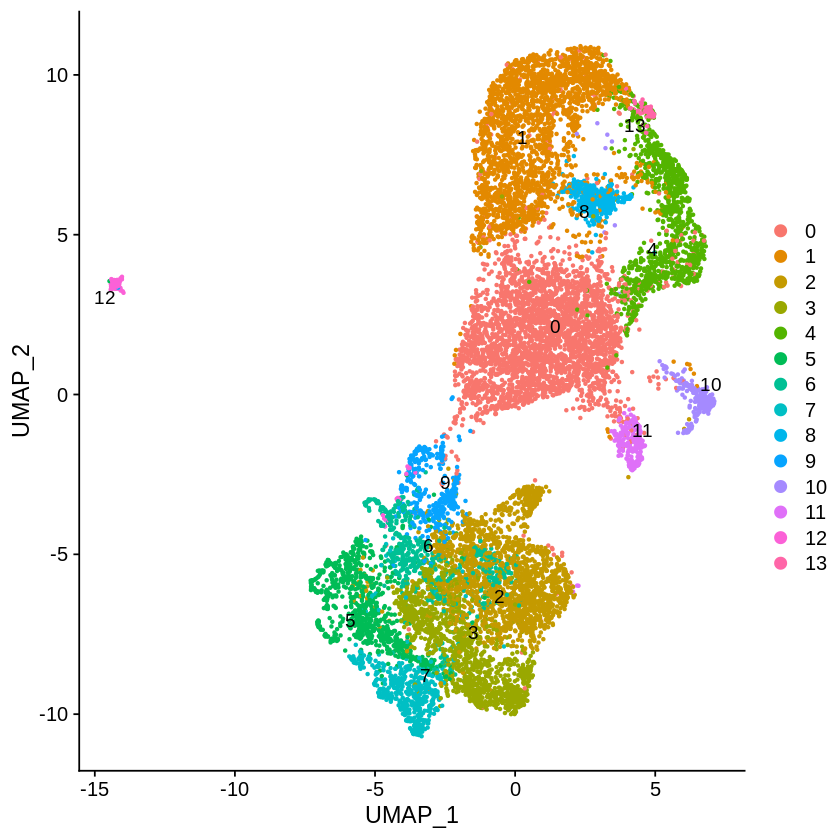

In [485]:
DimPlot(object = S_merge, reduction = "umap", group.by = "RNA_snn_res.0.5", label = TRUE, repel = TRUE,pt.size = 0.6) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/mergeNeurons_umap_number_100_7_0.5.pdf",width=10,height=10)

In [486]:
saveRDS(S_merge,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/S_merge.rds")

# proportion of fish and mice cell per cluster in simply merged data

In [491]:
Cell_type<-factor(c("0","1","2","3","4","5","6","7","8","9","10","11","12","13"),levels=c("0","1","2","3","4","5","6","7","8","9","10","11","12","13"))

In [492]:

L<-length(Cell_type)

Cell_number<- data.frame("cluster" =c(Cell_type,Cell_type), "species"=c(rep("Mouse",L),rep("FISH",L))) 

Mouse_f<-numeric()
FISH_f<-numeric()

for (i in 1:length(Cell_type)){
    Mouse_f[i]<-100*sum(subset(S_merge@meta.data,species=="Mouse")$seurat_clusters== Cell_type[i])/sum(S_merge@meta.data$seurat_clusters== Cell_type[i])
    FISH_f[i]<-100*sum(subset(S_merge@meta.data,species=="FISH")$seurat_clusters== Cell_type[i])/sum(S_merge@meta.data$seurat_clusters== Cell_type[i])
}
Cell_number$Fraction<-c(Mouse_f,FISH_f)


In [182]:
Cell_number

cluster species Fraction    
1   1      Mouse     0.06289308
2   2      Mouse    99.95322732
3   3      Mouse    99.75786925
4   4      Mouse     0.00000000
5   5      Mouse     0.00000000
6   6      Mouse    99.07329402
7   7      Mouse     0.00000000
8   8      Mouse     0.00000000
9   9      Mouse     9.24369748
10 10      Mouse     0.48543689
11 11      Mouse    98.76543210
12  1      FISH     99.93710692
13  2      FISH      0.04677268
14  3      FISH      0.24213075
15  4      FISH    100.00000000
16  5      FISH    100.00000000
17  6      FISH      0.92670598
18  7      FISH    100.00000000
19  8      FISH    100.00000000
20  9      FISH     90.75630252
21 10      FISH     99.51456311
22 11      FISH      1.23456790

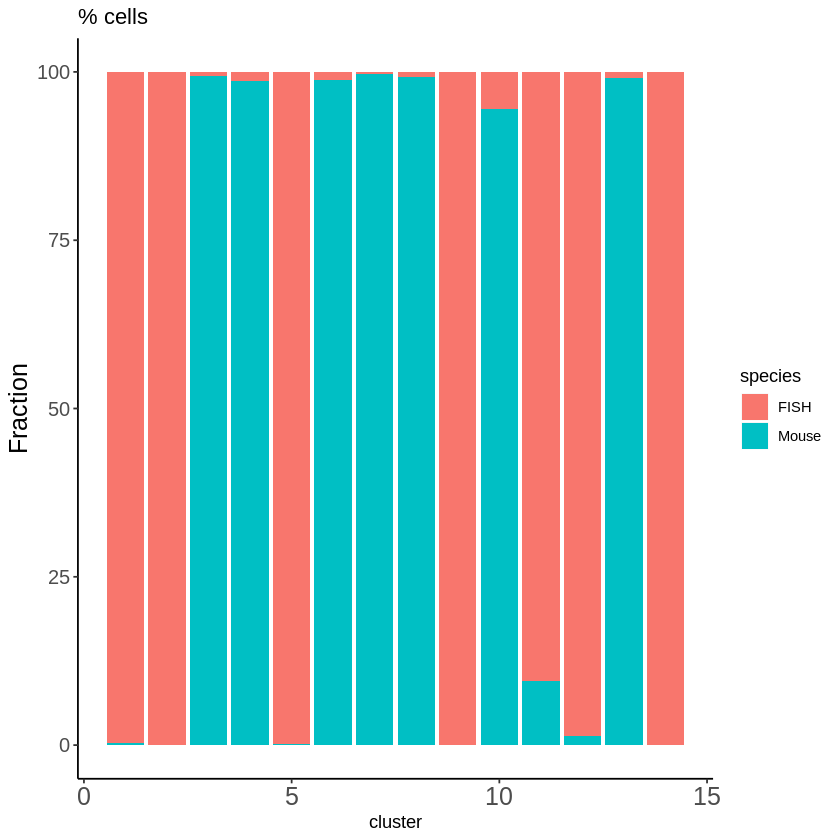

In [493]:
ggplot(Cell_number,aes(x=cluster,y=Fraction,fill=species))+geom_bar(stat="identity")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 0, hjust = 0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/percent of cells_percluster_detail_species_Simple_merge_FigureS4.pdf",height=6, width=10 , paper = "letter")

# integration

In [274]:
FISH1<- NormalizeData(object = FISH1,verbose = FALSE) 
FISH2<- NormalizeData(object = FISH2,verbose = FALSE) 
cntl<- NormalizeData(object = cntl,verbose = FALSE) 
stim<- NormalizeData(object =stim,verbose = FALSE) 

In [275]:
FISH1<- FindVariableFeatures(object =FISH1,selection.method = "vst", nfeatures = 100, verbose = FALSE)
length(x = VariableFeatures(object = FISH1))
FISH2<- FindVariableFeatures(object =FISH2,selection.method = "vst", nfeatures = 100, verbose = FALSE)
length(x = VariableFeatures(object = FISH2))
cntl<- FindVariableFeatures(object =cntl,selection.method = "vst", nfeatures = 100, verbose = FALSE)
length(x = VariableFeatures(object = cntl))
stim<- FindVariableFeatures(object =stim,selection.method = "vst", nfeatures = 100, verbose = FALSE)
length(x = VariableFeatures(object =stim))

[1] 100

[1] 100

[1] 100

[1] 100

In [276]:
Hb.list<-objects()

In [277]:
Hb.list$FISH1<-FISH1
Hb.list$FISH2<-FISH2
Hb.list$cntl<-cntl
Hb.list$stim<-stim

Warning message in Hb.list$FISH1 <- FISH1:
“Coercing LHS to a list”

In [278]:
reference.list <- Hb.list[c("FISH1","FISH2","cntl","stim")]
Hb.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:40)

Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 11026 anchors
Filtering anchors
	Retained 7604 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 8610 anchors
Filtering anchors
	Retained 4002 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 9428 anchors
Filtering anchors
	Retained 4914 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 8827 anchors
Filtering anchors
	Retained 4373 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 9862 anchors
Filtering anchors
	Retained 5473 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 8697 anc

In [279]:
Hb.integrated <- IntegrateData(anchorset = Hb.anchors, dims = 1:40) 

Merging dataset 1 into 2
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 3 into 4
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 4 3 into 2 1
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data


In [280]:
species<-vector()
for (i in 1:dim(Hb.integrated@meta.data)[1]){
   if (Hb.integrated@meta.data$stim[i]=="FISH1"){species[i]<-"FISH"}
    else if  (Hb.integrated@meta.data$stim[i]=="FISH2"){species[i]<-"FISH"}
    else  {species[i]<-"Mouse"}
}
Hb.integrated@meta.data$species<-species

13:28:36 Read 13269 rows and found 7 numeric columns
13:28:36 Using Annoy for neighbor search, n_neighbors = 30
13:28:36 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
13:28:38 Writing NN index file to temp file /tmp/RtmpIWoLyK/file537d3ed51816
13:28:38 Searching Annoy index using 1 thread, search_k = 3000
13:28:42 Annoy recall = 100%
13:28:42 Commencing smooth kNN distance calibration using 1 thread
13:28:43 Initializing from normalized Laplacian + noise
13:28:43 Commencing optimization for 200 epochs, with 542670 positive edges
13:28:53 Optimization finished


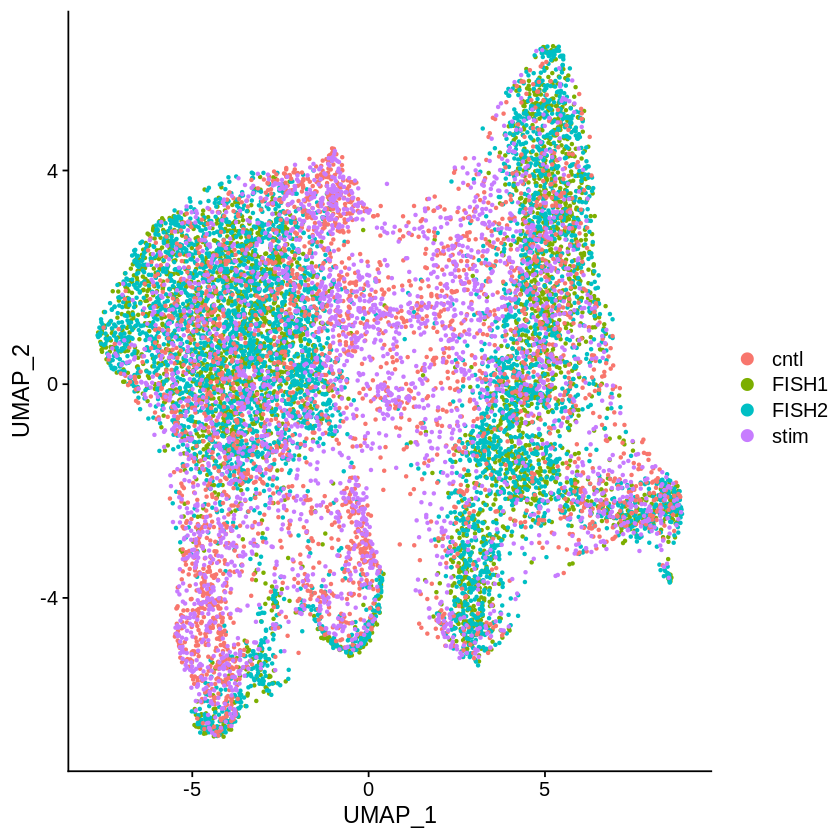

In [281]:
library(ggplot2)
library(cowplot)
# switch to integrated assay. The variable features of this assay are
# automatically set during IntegrateData
DefaultAssay(object = Hb.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
Hb.integrated <- ScaleData(object = Hb.integrated, verbose = FALSE)
Hb.integrated <- RunPCA(object = Hb.integrated, npcs = 7, verbose = FALSE)
Hb.integrated <- RunUMAP(object = Hb.integrated, reduction = "pca", 
    dims = 1:7)
p1 <- DimPlot(object = Hb.integrated, reduction = "umap", group.by = "stim",pt.size = 0.6)
#p2 <- DimPlot(object = LHb.integrated, reduction = "umap", group.by = "celltype", label = TRUE, repel = TRUE) + NoLegend()
#plot_grid(p1, p2)
plot_grid(p1,label_size = 50)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Neurons_umap_10_7_40.pdf",width=10,height=10)

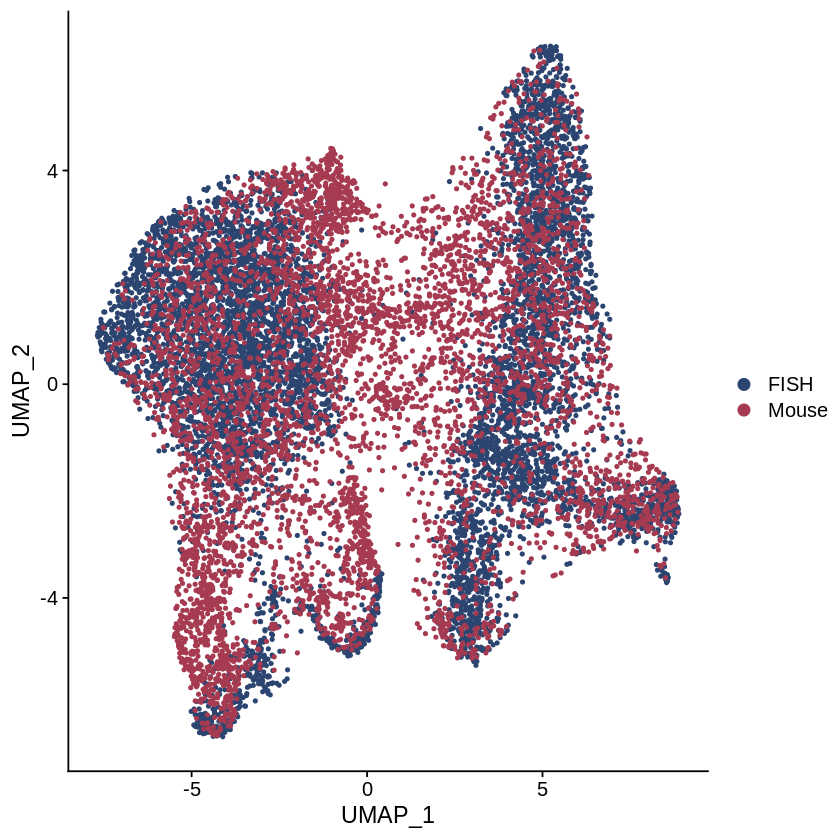

In [282]:
#visualiza by species
p1 <- DimPlot(object = Hb.integrated, reduction = "umap", group.by = "species",pt.size = 0.8,cols=c("#2b4570","#a63a50"))
#p2 <- DimPlot(object = LHb.integrated, reduction = "umap", group.by = "celltype", label = TRUE, repel = TRUE) + NoLegend()
#plot_grid(p1, p2)
plot_grid(p1,label_size = 50)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Neurons_umap_species_10_7_40.pdf",width=10,height=10)

# clustering on integrated data

In [283]:
Hb.integrated <- FindNeighbors(object = Hb.integrated,dims = 1:7)

Computing nearest neighbor graph
Computing SNN


In [284]:
Hb.integrated <- FindClusters(Hb.integrated, resolution = 0.5, dims = 1:7) 

Warning message:
“The following arguments are not used: dims”Warning message:
“The following arguments are not used: dims”

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13269
Number of edges: 401689

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8583
Number of communities: 10
Elapsed time: 1 seconds


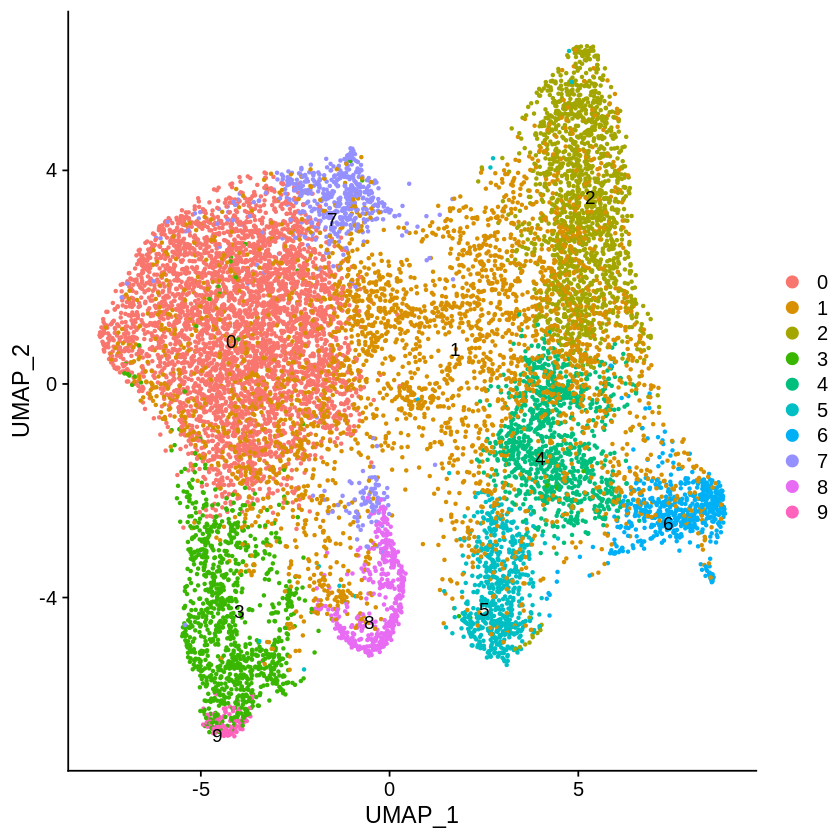

In [285]:
DimPlot(object = Hb.integrated, reduction = "umap",  label = TRUE, repel = TRUE,pt.size = 0.6) 

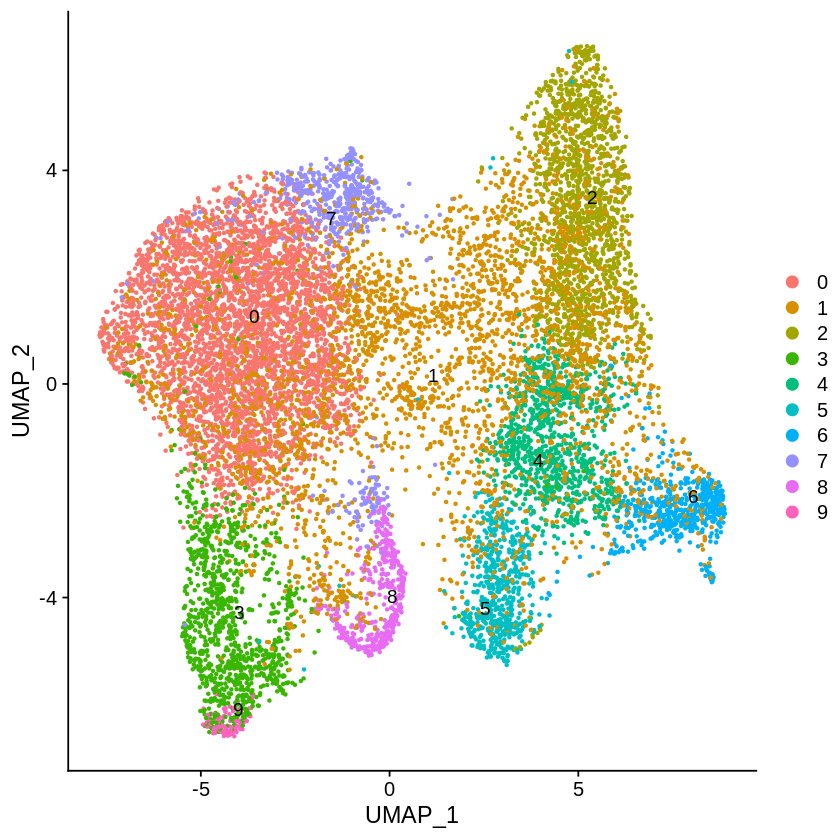

In [286]:
#visuzaling clusters
DimPlot(object = Hb.integrated, reduction = "umap", group.by = "integrated_snn_res.0.5", label = TRUE, repel = TRUE,pt.size = 0.6) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Neurons_umap_number_100_7_0.5_40.pdf",width=10,height=10)

In [287]:
saveRDS(Hb.integrated,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Hb.integrated_0.5_40.rds")

In [16]:
Hb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Hb.integrated_0.5_40.rds")

In [17]:
new.ident <- c("Integ1","Integ2","Integ3","Integ4","Integ5","Integ6","Integ7","Integ8","Integ9","Integ10")
names(x = new.ident) <- levels(x =Hb.integrated)
Hb.integrated<- RenameIdents(object =Hb.integrated, new.ident)

In [18]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Hb.integrated@assays$RNA@data[,which(Idents(object=Hb.integrated) %in% new.ident[i])]))}

In [19]:
Cell_type<-factor(new.ident,levels=new.ident)

In [20]:
type<-numeric()
for(i in 1:dim(Hb.integrated@meta.data)[1]){
type[i]<-new.ident[as.numeric(Hb.integrated@meta.data$seurat_clusters)[i]]
    }
Hb.integrated@meta.data$type<-type

In [21]:

L<-length(Cell_type)

Cell_number<- data.frame("cluster" =c(Cell_type,Cell_type), "species"=c(rep("Mouse",L),rep("FISH",L))) 

Mouse_f<-numeric()
FISH_f<-numeric()

for (i in 1:length(Cell_type)){
    Mouse_f[i]<-100*sum(subset(Hb.integrated@meta.data,species=="Mouse")$type== Cell_type[i])/sum(Hb.integrated@meta.data$type== Cell_type[i])
    FISH_f[i]<-100*sum(subset(Hb.integrated@meta.data,species=="FISH")$type== Cell_type[i])/sum(Hb.integrated@meta.data$type== Cell_type[i])
}
Cell_number$Fraction<-c(Mouse_f,FISH_f)


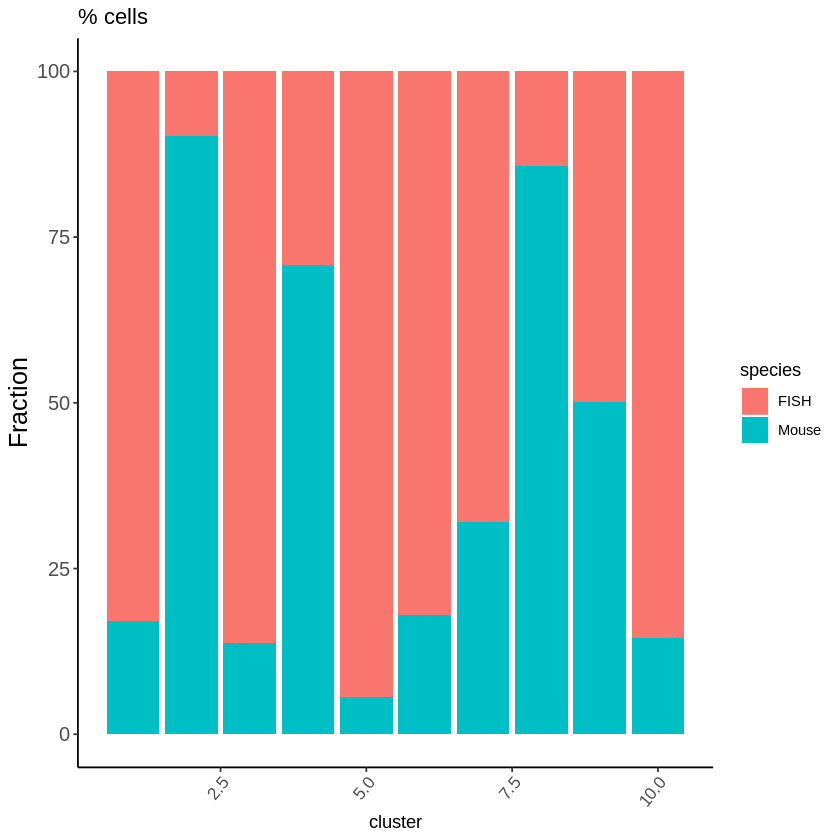

In [295]:
ggplot(Cell_number,aes(x=cluster,y=Fraction,fill=species))+geom_bar(stat="identity")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=10,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/percent of cells_percluster_detail_species_integrated_100_7_40.pdf",height=6, width=10 , paper = "letter")

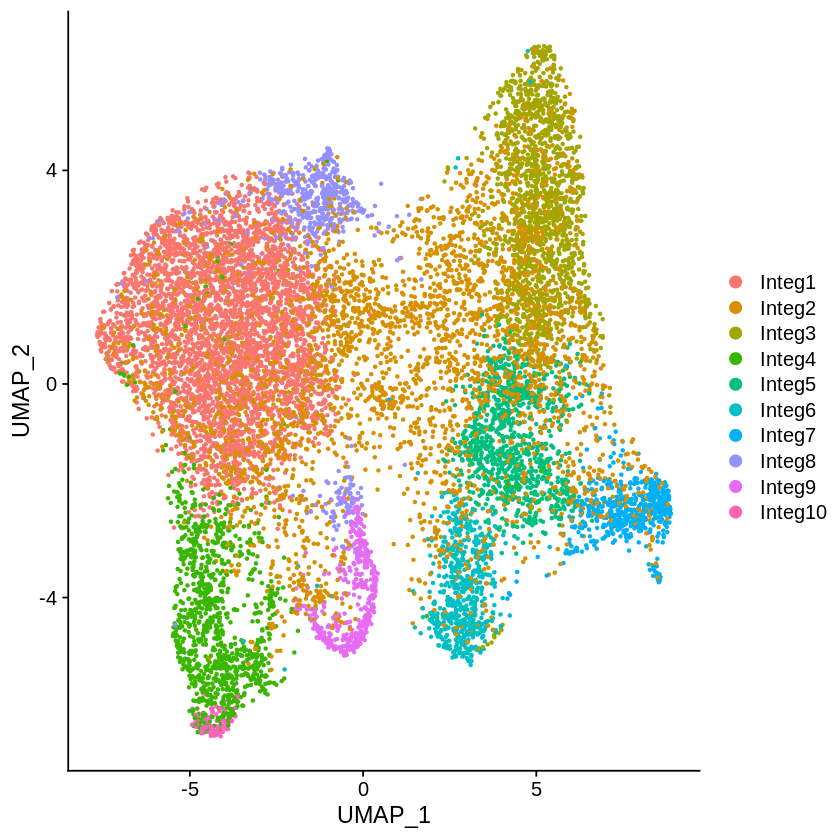

In [296]:
DimPlot(object = Hb.integrated, reduction = "umap",  label = FALSE, repel = TRUE,pt.size = 0.6) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Neurons_umap_species_clustername_integ_100_7_40.pdf",width=10,height=10)

In [6]:
#marker in each cell type
for (i in 1:length(new.ident)){
one.markers <- FindConservedMarkers(Hb.integrated, ident.1 = new.ident[i], grouping.var = "stim", 
    print.bar = FALSE)
sort_marker<-one.markers[order(-one.markers["cntl_avg_logFC"]),]
write.xlsx2(sort_marker,file=(paste("/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene200_10/conserved_markers/",new.ident[i],"_gene.xlsx",sep="")))}

Testing Integ1_cntl vs Integ6_cntl, Integ2_cntl, Integ8_cntl, Integ7_cntl, Integ9_cntl, Integ5_cntl, Integ3_cntl, Integ4_cntl, Integ11_cntl, Integ10_cntl, Integ13_cntl, Integ12_cntl

Testing Integ1_stim vs Integ2_stim, Integ6_stim, Integ5_stim, Integ3_stim, Integ8_stim, Integ12_stim, Integ7_stim, Integ9_stim, Integ11_stim, Integ10_stim, Integ4_stim, Integ13_stim

Testing Integ1_FISH1 vs Integ4_FISH1, Integ10_FISH1, Integ2_FISH1, Integ7_FISH1, Integ6_FISH1, Integ9_FISH1, Integ13_FISH1, Integ11_FISH1, Integ8_FISH1, Integ5_FISH1, Integ3_FISH1, Integ12_FISH1, Integ14_FISH1

Testing Integ1_FISH2 vs Integ10_FISH2, Integ2_FISH2, Integ9_FISH2, Integ5_FISH2, Integ11_FISH2, Integ4_FISH2, Integ13_FISH2, Integ12_FISH2, Integ8_FISH2, Integ7_FISH2, Integ3_FISH2, Integ6_FISH2, Integ14_FISH2

Testing Integ2_cntl vs Integ6_cntl, Integ8_cntl, Integ7_cntl, Integ9_cntl, Integ5_cntl, Integ3_cntl, Integ1_cntl, Integ4_cntl, Integ11_cntl, Integ10_cntl, Integ13_cntl, Integ12_cntl

Testing Integ2_stim vs Integ6

Testing Integ11_FISH1 vs Integ1_FISH1, Integ4_FISH1, Integ10_FISH1, Integ2_FISH1, Integ7_FISH1, Integ6_FISH1, Integ9_FISH1, Integ13_FISH1, Integ8_FISH1, Integ5_FISH1, Integ3_FISH1, Integ12_FISH1, Integ14_FISH1

Testing Integ11_FISH2 vs Integ10_FISH2, Integ2_FISH2, Integ1_FISH2, Integ9_FISH2, Integ5_FISH2, Integ4_FISH2, Integ13_FISH2, Integ12_FISH2, Integ8_FISH2, Integ7_FISH2, Integ3_FISH2, Integ6_FISH2, Integ14_FISH2

Testing Integ12_cntl vs Integ6_cntl, Integ2_cntl, Integ8_cntl, Integ7_cntl, Integ9_cntl, Integ5_cntl, Integ3_cntl, Integ1_cntl, Integ4_cntl, Integ11_cntl, Integ10_cntl, Integ13_cntl

Testing Integ12_stim vs Integ2_stim, Integ6_stim, Integ5_stim, Integ3_stim, Integ8_stim, Integ7_stim, Integ1_stim, Integ9_stim, Integ11_stim, Integ10_stim, Integ4_stim, Integ13_stim

Testing Integ12_FISH1 vs Integ1_FISH1, Integ4_FISH1, Integ10_FISH1, Integ2_FISH1, Integ7_FISH1, Integ6_FISH1, Integ9_FISH1, Integ13_FISH1, Integ11_FISH1, Integ8_FISH1, Integ5_FISH1, Integ3_FISH1, Integ14_FISH1

T

ERROR: Error in FindConservedMarkers(Hb.integrated, ident.1 = new.ident[i], grouping.var = "stim", : Identity: Integ14 not present in group cntl


In [8]:
for (i in 1:length(new.ident)){
one.markers <- FindMarkers(Hb.integrated, ident.1 = new.ident[i], grouping.var = "stim", 
    print.bar = FALSE)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(sort_marker,file=(paste("/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene200_10/markers/",new.ident[i],"_gene.xlsx",sep="")))}

# Disc plots

In [453]:
Cell_type<-factor(c("Integ2","Integ3","Integ5","Integ6","Integ7","Integ1","Integ8","Integ10","Integ4","Integ9"),levels=c("Integ2","Integ3","Integ5","Integ6","Integ7","Integ1","Integ8","Integ10","Integ4","Integ9"))
gene_list<-factor(rev(c("Syt9","Kctd4","Tac2","Map1b","Neurod1","Slc5a7","Tac1","Necab1","Cacna1b","Gad2","Gap43","Gabra1","Slc6a1","Lpar1")),levels=rev(c("Syt9","Kctd4","Tac2","Map1b","Neurod1","Slc5a7","Tac1","Necab1","Cacna1b","Gad2","Gap43","Gabra1","Slc6a1","Lpar1")))

In [454]:
rownames(LHb.integrated@meta.data)# the matrix has info of pct, avg, gene, cluster
#M and L eich
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(Hb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(Hb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(Hb.integrated@assays$RNA@data[gene_list[i],]))/sd(Hb.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] "AACACGTGTGGCAAACcntl" "AACCGCGGTAGGCATGcntl" "AACCGCGTCGACCAGCcntl"
   [4] "AACTCCCCAAAGCAATcntl" "AACTCCCGTCTAACGTcntl" "AACTGGTAGACTTTCGcntl"
   [7] "AAGACCTAGCCACGCTcntl" "AAGGAGCAGTGTTGAAcntl" "AAGGTTCGTGCAGGTAcntl"
  [10] "AAGTCTGAGATCGGGTcntl" "AATCCAGCAACGATGGcntl" "AATCGGTCACAAGCCCcntl"
  [13] "AATCGGTGTGGAAAGAcntl" "ACACTGAAGTTACGGGcntl" "ACACTGAGTCATCGGCcntl"
  [16] "ACAGCCGGTCGGCTCAcntl" "ACATGGTCAGCTGTTAcntl" "ACGAGCCCAGTAACGGcntl"
  [19] "ACGAGGATCGGACAAGcntl" "ACGCAGCTCCCACTTGcntl" "ACGGCCATCGTACGGCcntl"
  [22] "ACGGGTCGTAGCGTCCcntl" "ACTGAACGTCCAAGTTcntl" "AGACGTTTCCACGACGcntl"
  [25] "AGAGTGGGTAAATGACcntl" "AGATCTGCAATCGGTTcntl" "AGATCTGCACCATGTAcntl"
  [28] "AGATCTGGTGGACGATcntl" "AGCATACGTGGTCTCGcntl" "AGCATACTCGCTTAGAcntl"
  [31] "AGCCTAATCACGCATAcntl" "AGCGGTCCACGTGAGAcntl" "AGCGTCGCAGATGAGCcntl"
  [34] "AGCTCTCAGCGATGACcntl" "AGGCCGTCACGAAAGCcntl" "AGGGATGAGTCATGCTcntl"
  [37] "AGGTCATCAGATGGGTcntl" "AGGTCCGGTGGGTATGcntl" "AGTAGTCTCACCATAGcntl"
  [40] "AGTGGGACAGACACTTcntl" "AGTTGGTTCGAATCCAcntl" "ATAGACCAGATGGGTCcntl"
  [43] "ATCACGACATTCGACAcntl" "ATCATCTGTTTCGCTCcntl" "ATCCACCGTCCGACGTcntl"
  [46] "ATCCACCTCTACCAGAcntl" "ATCGAGTTCGGTGTCGcntl" "ATCTACTCACGCATCGcntl"
  [49] "ATCTACTCATGCTGGCcntl" "ATGAGGGCATGGTTGTcntl" "ATGCGATCACCTGGTGcntl"
  [52] "ATTGGTGCAGCCAGAAcntl" "ATTTCTGAGATCGATAcntl" "CAACCTCGTCTTGATGcntl"
  [55] "CAACCTCTCTTACCGCcntl" "CAAGATCTCATGCATGcntl" "CAAGGCCTCTTTAGTCcntl"
  [58] "CACAGTATCCAGTAGTcntl" "CACATAGTCACATGCAcntl" "CACCAGGCACTCAGGCcntl"
  [61] "CACCTTGGTTCGCGACcntl" "CAGCAGCCACCGATATcntl" "CAGCAGCGTGCTCTTCcntl"
  [64] "CAGCGACCACAGACTTcntl" "CAGCGACTCAAAGACAcntl" "CATCAAGCAAGGGTCAcntl"
  [67] "CATCGAAGTGTTTGTGcntl" "CATGCCTAGGGTCGATcntl" "CATTCGCTCCTGCTTGcntl"
  [70] "CCCAATCAGTGCTGCCcntl" "CCCAATCTCGAATGCTcntl" "CCCAGTTTCTTGTATCcntl"
  [73] "CCCATACCATGGTCTAcntl" "CCCTCCTGTGAGGCTAcntl" "CCGGTAGCAGACAGGTcntl"
  [76] "CCGTACTGTTCAGCGCcntl" "CCTACCAGTGGAAAGAcntl" "CCTATTACAGGACGTAcntl"
  [79] "CCTCTGACATAGACTCcntl" "CCTTACGTCACGACTAcntl" "CCTTCCCCAACTGGCCcntl"
  [82] "CCTTCCCGTGGTACAGcntl" "CGAACATAGAGCAATTcntl" "CGACTTCAGGCATGGTcntl"
  [85] "CGACTTCCACATGGGAcntl" "CGATCGGTCGTGGTCGcntl" "CGATGGCAGGTTACCTcntl"
  [88] "CGCGGTAGTTTACTCTcntl" "CGCTTCAAGTGGGATCcntl" "CGGACACGTCCAGTATcntl"
  [91] "CGGACTGTCGTTGCCTcntl" "CGTAGGCCAAACAACAcntl" "CGTCAGGGTAGCAAATcntl"
  [94] "CGTCTACTCTGCTGCTcntl" "CGTGAGCAGGGTTCCCcntl" "CGTGAGCAGGTAGCTGcntl"
  [97] "CGTTAGACAAGAGGCTcntl" "CTAAGACCACGACTCGcntl" "CTAGAGTGTCTTCGTCcntl"
 [100] "CTAGAGTTCTGTTTGTcntl" "CTCACACGTTTAGCTGcntl" "CTCATTAGTGACGCCTcntl"
 [103] "CTCGTCATCAGCTGGCcntl" "CTGAAGTGTGCAACTTcntl" "CTGATAGTCCGCATAAcntl"
 [106] "CTGATCCAGGAGTACCcntl" "CTGCGGACATTACGACcntl" "CTGGTCTAGACGCTTTcntl"
 [109] "CTGTGCTAGCGTAGTGcntl" "CTGTGCTCAGTATGCTcntl" "GAAACTCGTTGCCTCTcntl"
 [112] "GAACATCCATTTGCCCcntl" "GACACGCTCCCTTGCAcntl" "GAGCAGAGTCTCTCTGcntl"
 [115] "GAGGTGAAGCCACGCTcntl" "GATCGATGTAACGCGAcntl" "GATCGCGCAAGCGAGTcntl"
 [118] "GATGCTAAGACCTTTGcntl" "GCATACAGTTGGAGGTcntl" "GCATGCGAGTGACTCTcntl"
 [121] "GCATGCGTCATGGTCAcntl" "GCATGTAGTTTAAGCCcntl" "GCCAAATAGCTATGCTcntl"
 [124] "GCCTCTAGTGTAACGGcntl" "GGACAAGGTCTGGTCGcntl" "GGATGTTTCACGCATAcntl"
 [127] "GGCCGATGTTATGTGCcntl" "GGGACCTCATGGTCATcntl" "GGGCACTTCCATGCTCcntl"
 [130] "GGGTCTGAGAGTACCGcntl" "GGTATTGTCTAACTGGcntl" "GTACTCCAGACAGGCTcntl"
 [133] "GTACTCCGTACCGTTAcntl" "GTCATTTGTCCTGCTTcntl" "GTCATTTTCTCCAACCcntl"
 [136] "GTCGTAAAGCCCGAAAcntl" "GTCTTCGCATTGTGCAcntl" "GTGTTAGCACGAGGTAcntl"
 [139] "GTGTTAGGTTGAGTTCcntl" "GTTACAGGTGCGCTTGcntl" "GTTACAGTCCAAACACcntl"
 [142] "GTTCGGGGTCGAATCTcntl" "GTTCTCGCAAGGCTCCcntl" "TAAGCGTTCAACCAACcntl"
 [145] "TACAGTGTCGGCGCATcntl" "TAGCCGGGTCTAGAGGcntl" "TATTACCCAAAGGTGCcntl"
 [148] "TCAGCAAAGCAGCCTCcntl" "TCAGCAAGTTATTCTCcntl" "TCAGCAATCACGCGGTcntl"
 [151] "TCAGCTCGTGTGAATAcntl" "TCAGGATGTGCTCTTCcntl" "TCAGGTATCGGTTCGGcntl"
 [154] "TCGCGAGCAAGGACTGcntl" "TCGCGAGGTCGCATATcntl" "TCGCGAGTCAACGGGAcntl"
 [157] "TCGCGTTGTCGCTTCTcntl" "TCGCGTTTCTTGTTTGcntl

[1] Integ2  Integ3  Integ5  Integ6  Integ7  Integ1  Integ8  Integ10 Integ4 
 [10] Integ9  Integ2  Integ3  Integ5  Integ6  Integ7  Integ1  Integ8  Integ10
 [19] Integ4  Integ9  Integ2  Integ3  Integ5  Integ6  Integ7  Integ1  Integ8 
 [28] Integ10 Integ4  Integ9  Integ2  Integ3  Integ5  Integ6  Integ7  Integ1 
 [37] Integ8  Integ10 Integ4  Integ9  Integ2  Integ3  Integ5  Integ6  Integ7 
 [46] Integ1  Integ8  Integ10 Integ4  Integ9  Integ2  Integ3  Integ5  Integ6 
 [55] Integ7  Integ1  Integ8  Integ10 Integ4  Integ9  Integ2  Integ3  Integ5 
 [64] Integ6  Integ7  Integ1  Integ8  Integ10 Integ4  Integ9  Integ2  Integ3 
 [73] Integ5  Integ6  Integ7  Integ1  Integ8  Integ10 Integ4  Integ9  Integ2 
 [82] Integ3  Integ5  Integ6  Integ7  Integ1  Integ8  Integ10 Integ4  Integ9 
 [91] Integ2  Integ3  Integ5  Integ6  Integ7  Integ1  Integ8  Integ10 Integ4 
[100] Integ9  Integ2  Integ3  Integ5  Integ6  Integ7  Integ1  Integ8  Integ10
[109] Integ4  Integ9  Integ2  Integ3  Integ5  Integ6  Integ7  Integ1  Integ8 
[118] Integ10 Integ4  Integ9  Integ2  Integ3  Integ5  Integ6  Integ7  Integ1 
[127] Integ8  Integ10 Integ4  Integ9  Integ2  Integ3  Integ5  Integ6  Integ7 
[136] Integ1  Integ8  Integ10 Integ4  Integ9 
10 Levels: Integ2 Integ3 Integ5 Integ6 Integ7 Integ1 Integ8 Integ10 ... Integ9

In [455]:
library(scales)
library(reshape2)

In [456]:
library(ggplot2)

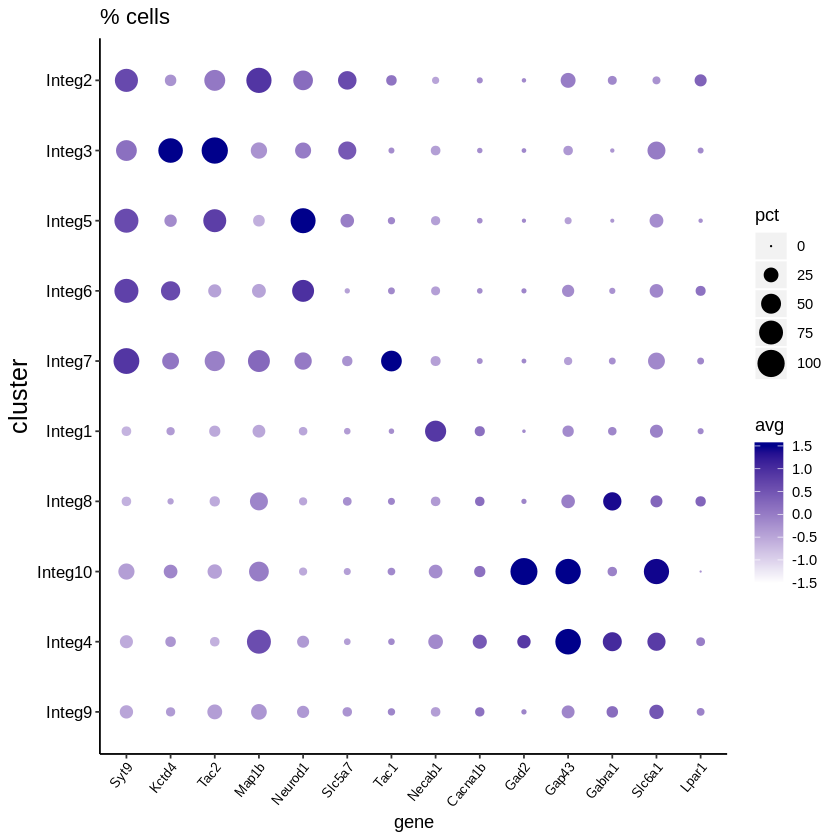

In [462]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) +  scale_x_discrete(limits = rev(levels(Cell_number$gene)))+scale_y_discrete(limits =rev(levels(Cell_number$cluster)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,7),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=10,colour = "black"),axis.text.x=element_text(size=8,angle = 50, hjust =1,colour = "black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/markers_wide2_Fig4.pdf",height=4, width=16 , paper = "letter")

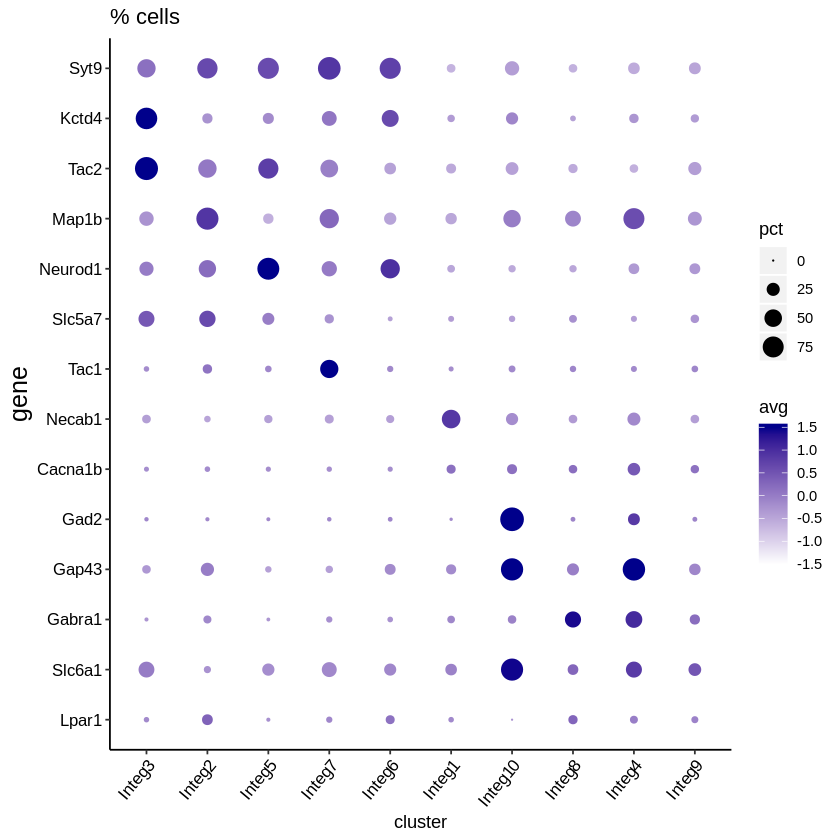

In [359]:
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) +  scale_x_discrete(limits = (levels(Cell_number$cluster)))+scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,6))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=10,colour = "black"),axis.text.x=element_text(size=10,angle = 50, hjust =1,colour = "black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/disc_integrated_markers_wide2r.pdf",height=6, width=5 , paper = "letter")

# cross correlation  between integrated clusters and mice only clusters

In [2]:
LHb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/LHb_integrated_0.8.rds")
new.ident <- c("MHb1","MHb2","MHb3","LHb1","LHb2","LHb3","MHb4","LHb4","MHb5","LHb5","LHb6","MHb6","Surr1","Surr2","Surr3","Surr4")
names(x = new.ident) <- levels(x =LHb.integrated)
LHb.integrated<- RenameIdents(object =LHb.integrated, new.ident)

In [3]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LHb.integrated@assays$RNA@data[,which(Idents(object=LHb.integrated) %in% new.ident[i])]))}
LHb.integrated<-subset(x=LHb.integrated,cells=c(MHb1_barcode,MHb2_barcode,MHb3_barcode,LHb1_barcode,LHb2_barcode,LHb3_barcode,MHb4_barcode,MHb5_barcode,LHb4_barcode,LHb5_barcode,MHb6_barcode,LHb6_barcode))

In [4]:
Hb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Hb.integrated_0.5_40.rds")

In [5]:
new.ident <- c("Integ1","Integ2","Integ3","Integ4","Integ5","Integ6","Integ7","Integ8","Integ9","Integ10")
names(x = new.ident) <- levels(x =Hb.integrated)
Hb.integrated<- RenameIdents(object =Hb.integrated, new.ident)

In [6]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Hb.integrated@assays$RNA@data[,which(Idents(object=Hb.integrated) %in% new.ident[i])]))}

In [7]:
mouse<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")
integrated<-rev(c("Integ2","Integ3","Integ5","Integ6","Integ7","Integ1","Integ8","Integ10","Integ4","Integ9"))

using integrated data (few genes)

In [8]:
corr<- data.frame(matrix(NA, ncol=length(mouse),nrow=length(integrated)))
rownames(corr)<-factor(integrated,levels=integrated)
colnames(corr)<-factor(mouse,levels=mouse)


In [9]:
p_value<- data.frame(matrix(NA, ncol=length(mouse),nrow=length(integrated)))
rownames(p_value)<-factor(integrated,levels=integrated)
colnames(p_value)<-factor(mouse,levels=mouse)

In [10]:
genes<-intersect(LHb.integrated@assays$integrated@var.features,Hb.integrated@assays$integrated@var.features)
mouse_exp<-LHb.integrated@assays$RNA@data[genes,]
integrated_exp<-Hb.integrated@assays$RNA@data[genes,]

In [11]:
Hb.integrated@assays$integrated@var.features

[1] "Hes5"     "Fabp7"    "Hspb1"    "Hes1"     "Synpr"    "Id1"     
  [7] "Sst"      "Dlk1"     "Cck"      "Pvalb"    "Htr2c"    "Gabra1"  
 [13] "Cd63"     "Jdp2"     "Trh"      "Loxl2"    "Gad1"     "Tmem255a"
 [19] "Gad2"     "Lsp1"     "Nrxn3"    "Nip7"     "Nrgn"     "Cplx2"   
 [25] "Pam"      "Gstp1"    "Egr2"     "Map1b"    "Gap43"    "Mrpl9"   
 [31] "Spx"      "Pycr2"    "Pdyn"     "Rab3c"    "Cxcl14"   "Glul"    
 [37] "G0s2"     "Mdk"      "Penk"     "Fgfbp3"   "Ptn"      "Cplx1"   
 [43] "Gm5741"   "Nr2f2"    "Slc5a7"   "Myo16"    "Ndrg4"    "Acta2"   
 [49] "Cbln1"    "Tac1"     "Tac2"     "Nxph2"    "Pcdh10"   "Calb2"   
 [55] "Slc32a1"  "Hmgn2"    "Rapgef4"  "Nts"      "Rrm2"     "S100b"   
 [61] "Rasd1"    "Gfod2"    "Ntng1"    "Gata3"    "Pcp4"     "Lepr"    
 [67] "Slc24a3"  "Stmn1"    "C1ql3"    "Chrm2"    "Serpinh1" "Rasgrf2" 
 [73] "Sept11"   "S100a10"  "Mfge8"    "Necab3"   "Zfhx3"    "Cebpb"   
 [79] "Clic4"    "Slc1a3"   "Sox3"     "Cpne9"    "Calb1"    "Gng8"    
 [85] "Clybl"    "Dcaf17"   "Slc17a7"  "Igfbp5"   "Vsnl1"    "Cox4i2"  
 [91] "Dtx1"     "Sparc"    "Foxj1"    "Elmo1"    "Parp1"    "Pcdh17"  
 [97] "Pax6"     "Kcnip4"   "Syn2"     "Stxbp6"   "Syt15"    "Nkx2-2"  
[103] "Slc6a1"   "Atp1b1"   "Slc3a2"   "Bdnf"     "Ccnd1"    "Ppargc1a"
[109] "Cbln2"    "Rorb"     "Tuba8"    "Ahi1"     "Fndc5"    "Plp1"    
[115] "Cnp"      "Slbp"     "Adh5"     "Tmem245"  "Ddc"      "Six3"    
[121] "Mt2"      "Exosc2"   "Mrpl47"   "Cldn11"   "S100a13"  "Mdp1"    
[127] "Plk4"     "Fos"      "Golga3"   "Parvb"    "Barhl2"   "Tubb5"   
[133] "Serpine2" "Nupr1"    "Zfp36l2"  "Msmo1"    "Rabif"    "Capg"    
[139] "Id3"      "Pde6g"    "Gfap"     "Mbp"      "Gatm"     "Tal1"    
[145] "Vps8"     "Cyr61"    "Sqle"     "Atp1a2"   "Proca1"   "Rsl24d1" 
[151] "Egr1"     "Phex"     "Foxp4"    "Nme5"     "Vtn"      "Lin7a"   
[157] "Lipg"     "Gng2"     "Lgals3"   "Clu"      "Crtac1"   "Ebf3"    
[163] "Kctd4"    "Copz2"    "Dlgap1"   "Tbata"    "H1fx"     "Plch2"   
[169] "Dll1"     "Th"       "Arid4a"   "Mgarp"    "Pnoc"     "Hcn1"    
[175] "Hmgcs1"   "Ankrd12"  "Atf3"     "Rab3b"    "Fam207a"  "Isg15"   
[181] "Ier3"     "Foxa1"    "Olig2"    "Tnnt1"    "Gtf2f1"   "Rbfox1"  
[187] "Rnf8"     "Grifin"   "Rab40b"   "Rbms3"    "Terf2ip"  "Lgi2"    
[193] "Igfbp3"   "Rpl3"     "Ccdc115"  "Tppp3"    "Slc25a19" "Dlg1"    
[199] "Dusp2"    "Mef2c"    "Zbtb8a"   "Chst14"   "Necab1"   "Sphkap"  
[205] "Agl"      "Aldob"    "Pou2f2"   "Adm"      "Crhbp"    "Rrad"    
[211] "St3gal5"  "Syt2"     "Cntfr"    "Timm10b"  "AI593442" "Npy"     
[217] "Npy2r"    "Prrg1"    "Atpaf2"   "Pdzd8"    "Crabp2"   "Sez6l"   
[223] "Sstr1"    "Ttyh2"    "Cpne4"    "Cryba4"   "Kcnc1"    "Sod3"    
[229] "Ak5"      "Asphd2"   "Cenpc1"   "Id2"      "Rasl11b"  "Atf5"    
[235] "Cpsf2"    "Gpc3"     "Lmo3"     "Sorbs1"   "Ebf1"     "Elavl4"  
[241] "Fosl2"    "Rpl19"    "Kcnk2"    "Rpl12"    "Topbp1"   "Nol4l"   
[247] "Nxph1"    "Rpa2"     "Fktn"     "Syt9"     "Cebpa"    "Tmem192" 
[253] "Gbx2"     "Mcm2"     "Commd3"   "Neurod1"  "Usp40"    "Rpl13"   
[259] "Spock3"   "Syndig1l" "Tgfbi"

In [12]:
mouse_exp<-t(scale(t(as.matrix(mouse_exp))))
integrated_exp<-t(scale(t(as.matrix(integrated_exp))))

In [13]:
for (i in 1:length(mouse)){
    for (j in 1:length(integrated)){
    corr[j,i]<-cor(rowMeans(as.matrix(mouse_exp[,eval(parse(text = paste(mouse[i],"_barcode",sep="")))])),rowMeans(as.matrix(integrated_exp[,eval(parse(text = paste(integrated[j],"_barcode",sep="")))])))
}}

In [14]:
for (i in 1:length(mouse)){
    for (j in 1:length(integrated)){
   p_value[j,i]<-cor.test(rowMeans(as.matrix(mouse_exp[,eval(parse(text = paste(mouse[i],"_barcode",sep="")))])),rowMeans(as.matrix(integrated_exp[,eval(parse(text = paste(integrated[j],"_barcode",sep="")))])))$p.value
}}

In [15]:
test.m <- melt(as.matrix(corr))
test.p <- melt(as.matrix(p_value))

In [16]:
min(corr)
max(corr)

[1] -0.6765303

[1] 0.8451661

In [17]:
for(i in 1:dim(test.m)[1]){
    if (test.p$value[i]>0.05){
        test.m$value[i]<-0
    }else{
        test.m$value[i]<-test.m$value[i]
    }
}

In [18]:
library(scales)

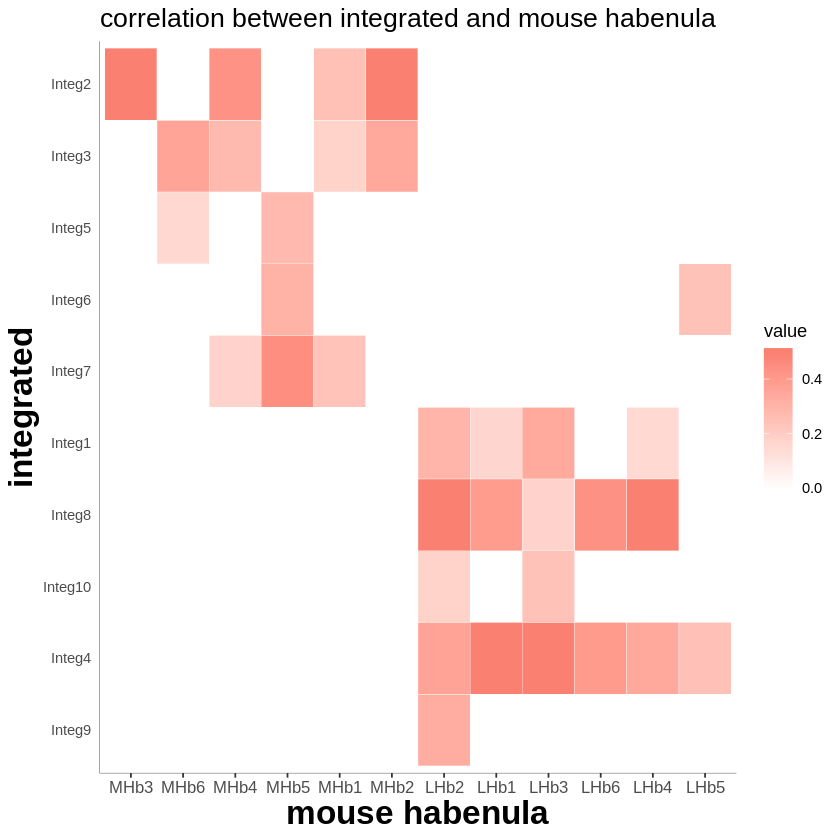

In [19]:
p <- ggplot(test.m, aes(Var2, Var1)) + geom_tile(aes(fill =value),
     colour = "white")+ scale_fill_continuous(limits=c(0, 0.5), breaks=seq(0,0.5,by=0.2),low = "white",high = "salmon", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("integrated")+xlab("mouse habenula")+theme(axis.text.x=element_text(size=10),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank())+ggtitle("correlation between integrated and mouse habenula")
print(pp)

# Cross correlation between integrated clusters and FISH only clusters

In [435]:
FISH<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/FISH_only/2000_30_FISH.rds")
new.ident <-c("VHb1","DHb1","DHb2","VHb2","VHb3","DHb3","DHb4","DHb5","VHb4","DHb6","VHb5","VHb6","VHb7")
names(x = new.ident) <- levels(x =FISH)
FISH<- RenameIdents(object =FISH, new.ident)

In [436]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(FISH@assays$RNA@data[,which(Idents(object=FISH) %in% new.ident[i])]))}

In [437]:
Hb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/Hb.integrated_0.5_40.rds")
new.ident <- c("Integ1","Integ2","Integ3","Integ4","Integ5","Integ6","Integ7","Integ8","Integ9","Integ10")
names(x = new.ident) <- levels(x =Hb.integrated)
Hb.integrated<- RenameIdents(object =Hb.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Hb.integrated@assays$RNA@data[,which(Idents(object=Hb.integrated) %in% new.ident[i])]))}

In [438]:
fish<-c("DHb1","DHb2","DHb3","DHb4","DHb5","DHb6","VHb1","VHb2","VHb3","VHb4","VHb5","VHb6","VHb7")
integrated<-rev(c("Integ2","Integ3","Integ5","Integ6","Integ7","Integ1","Integ8","Integ10","Integ4","Integ9"))

In [439]:
corr<- data.frame(matrix(NA, ncol=length(fish),nrow=length(integrated)))
rownames(corr)<-factor(integrated,levels=integrated)
colnames(corr)<-factor(fish,levels=fish)

In [440]:
p_value<- data.frame(matrix(NA, ncol=length(fish),nrow=length(integrated)))
rownames(p_value)<-factor(integrated,levels=integrated)
colnames(p_value)<-factor(fish,levels=fish)

convert FISH genes to mouse gnes

In [441]:
conversion<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/converted_genes.xlsx",sheetIndex=1)

In [443]:
converted_gene<-numeric()
for(i in 1:length(rownames(FISH@assays$RNA@data))){
converted_gene[i]<-toString(conversion[grep(rownames(FISH@assays$RNA@data)[i],conversion[,3]),2])
}

In [444]:
rownames(FISH@assays$RNA@data)<-converted_gene

In [445]:
genes<-intersect(rownames(Hb.integrated@assays$integrated@data),rownames(FISH@assays$RNA@data))
fish_exp<-FISH@assays$RNA@data[genes,]
integrated_exp<-Hb.integrated@assays$RNA@data[genes,]

In [446]:
fish_exp<-t(scale(t(as.matrix(fish_exp))))
integrated_exp<-t(scale(t(as.matrix(integrated_exp))))

In [447]:
for (i in 1:length(fish)){
    for (j in 1:length(integrated)){
    corr[j,i]<-cor(rowMeans(as.matrix(fish_exp[,eval(parse(text = paste(fish[i],"_barcode",sep="")))])),rowMeans(as.matrix(integrated_exp[,eval(parse(text = paste(integrated[j],"_barcode",sep="")))])))
}}

In [448]:
for (i in 1:length(fish)){
    for (j in 1:length(integrated)){
   p_value[j,i]<-cor.test(rowMeans(as.matrix(fish_exp[,eval(parse(text = paste(fish[i],"_barcode",sep="")))])),rowMeans(as.matrix(integrated_exp[,eval(parse(text = paste(integrated[j],"_barcode",sep="")))])))$p.value
}}

In [449]:
test.m <- melt(as.matrix(corr))
test.p <- melt(as.matrix(p_value))

In [451]:
for(i in 1:dim(test.m)[1]){
    if (test.p$value[i]>0.05){
        test.m$value[i]<-0
    }else{
        test.m$value[i]<-test.m$value[i]
    }
}

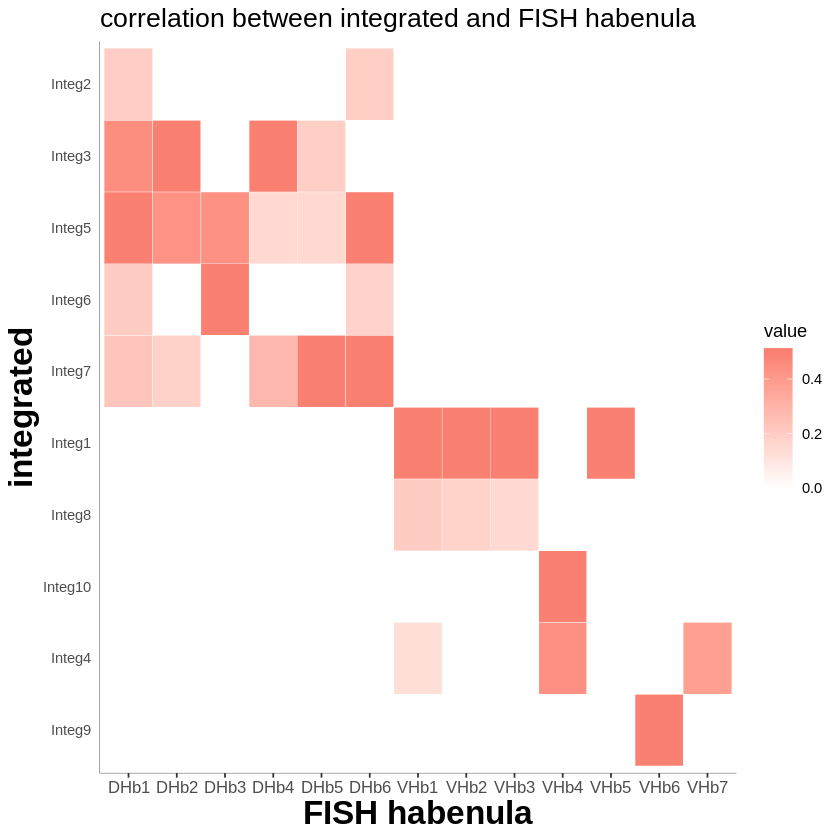

In [452]:
library("scales")
p <- ggplot(test.m, aes(Var2, Var1)) + geom_tile(aes(fill =value),
     colour = "white")+ scale_fill_continuous(limits=c(0, 0.5), breaks=seq(0,0.5,by=0.2),low = "white",high = "salmon", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("integrated")+xlab("FISH habenula")+theme(axis.text.x=element_text(size=10),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank())+ggtitle("correlation between integrated and FISH habenula")
print(pp)

# feature map

In [333]:
DefaultAssay(Hb.integrated) <- "RNA"

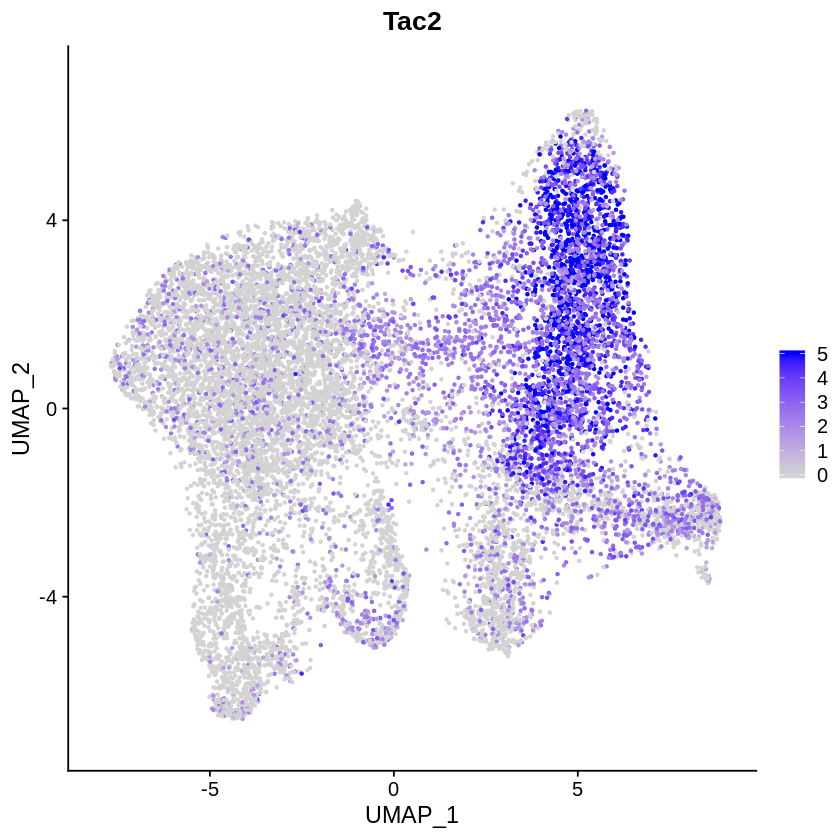

In [365]:
FeaturePlot(object =Hb.integrated, features = c("Tac2"),max.cutoff = 5 ,pt.size=0.6)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/feature_mvsl_Tac2_10_7_40.pdf",width=10,height=10)

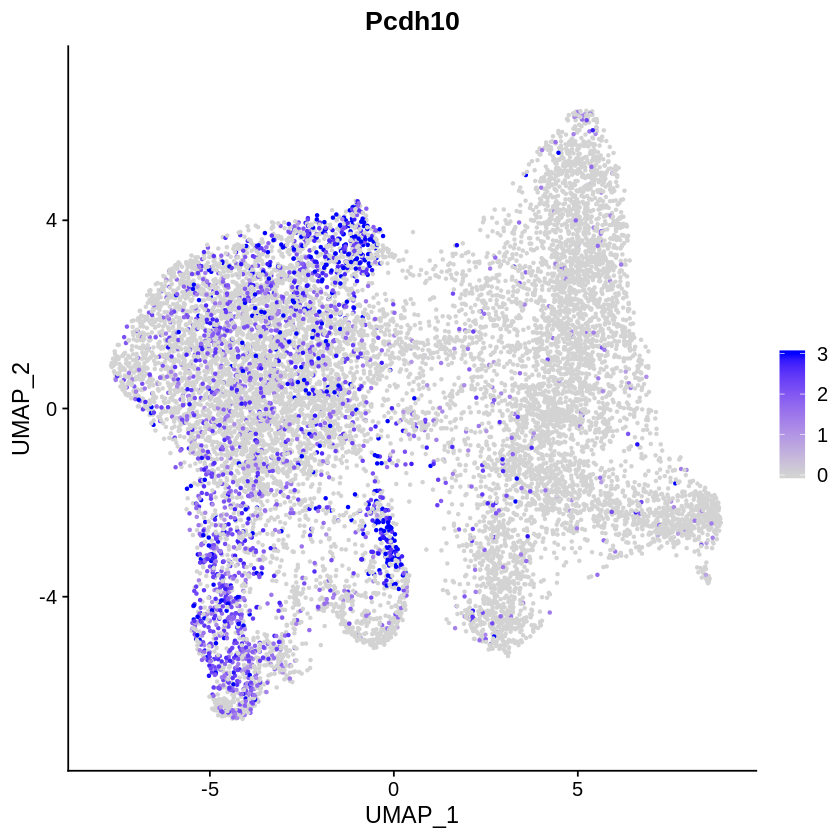

In [363]:
FeaturePlot(object =Hb.integrated, features = c("Pcdh10"),max.cutoff = 3, pt.size = 0.6)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/FISH/integrated/conversion/conversion_max/gene100_7/feature_mvsl_Pcdh10_10_7_40.pdf",width=10,height=10)

In [637]:
fish_barcode<-rownames(Hb.integrated@meta.data)[Hb.integrated@meta.data$species=="FISH"]

In [638]:
mouse_barcode<-rownames(Hb.integrated@meta.data)[Hb.integrated@meta.data$species=="Mouse"]